### решение тестовых задач Тинькофф

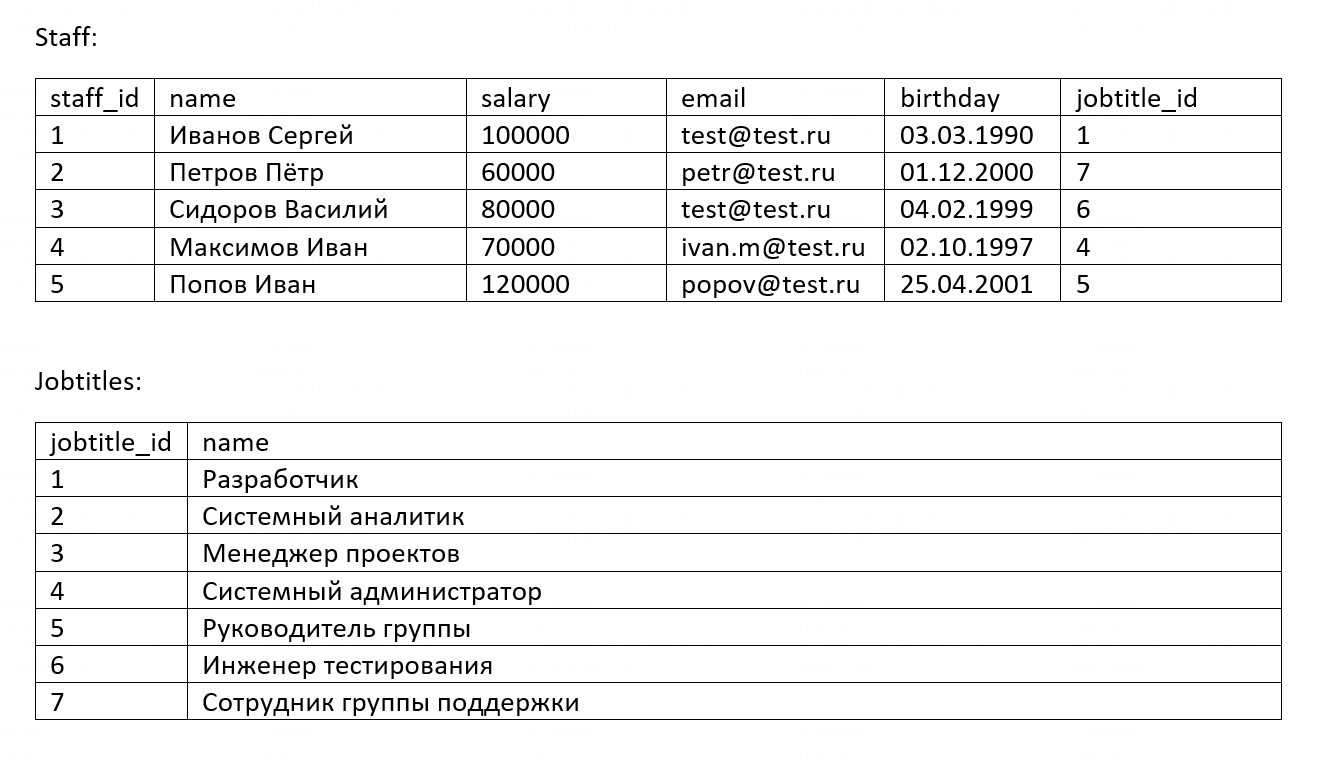

1) Напишите запрос, с помощью которого можно найти дубли в поле email из таблицы Sfaff.

In [ ]:
select * from staff
where email in 
	(select email
	from staff
	group by email
    having count(*)>1)


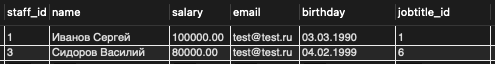

2) Напишите запрос, с помощью которого можно определить возраст каждого сотрудника из таблицы Staff на момент запроса.

In [ ]:
select staff_id, name, salary, email, birthday, jobtitle_id,
floor(datediff(cur_date, birthday_date)/365) as emp_age		-- считаем разницу в возрасте в днях и переводим в годы
from( – создаем вложенный запрос для вывода текущей даты и перевода дня рождения в нужный формат
	select *, 
	CURRENT_DATE() as cur_date,	-- выводим текущую дату
	STR_TO_DATE(birthday, '%d.%m.%Y') AS birthday_date  -- переводим запись о дне рождения в формат date 
	from staff) as temp


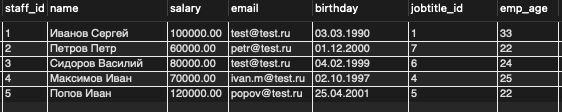

3) Напишите запрос, с помощью которого можно определить должность (Jobtitles.name) со вторым по величине уровнем зарплаты.

In [ ]:
select Jobtitles.name, salary from
(SELECT *
FROM Staff
ORDER BY salary DESC  -- отсортируем по убыванию зарплат
LIMIT 1 OFFSET 1 -- ограничим вывод только одной строки сверху, пропуская самую первую
) as sec_salary
inner join Jobtitles using(jobtitle_id)


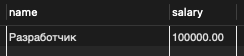